MeanShift Labels Segmentation:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 1 0]
 [0 0 0 ... 1 1 0]
 [0 0 0 ... 1 1 0]]
MeanShift Watershed Segmentation:
 [[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [62 62 62 ... 64 64 63]
 [62 62 62 ... 64 64  0]
 [62 62 62 ... 64 64  0]]


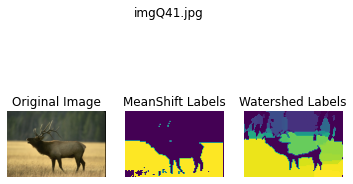

MeanShift Labels Segmentation:
 [[0 0 0 ... 0 0 6]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 1 1 ... 1 3 0]
 [1 1 1 ... 1 3 0]
 [1 1 1 ... 3 3 0]]
MeanShift Watershed Segmentation:
 [[21 21 21 ...  1  1  0]
 [21 21 21 ...  1  1  0]
 [21 21 21 ...  1  1 14]
 ...
 [21 21 21 ... 14 14 14]
 [21 21 21 ... 14 14 14]
 [21 21 21 ... 14 14 14]]


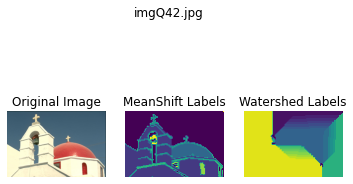

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import ndimage as ndi
from skimage.morphology import watershed
from skimage.feature import peak_local_max
from sklearn.cluster import MeanShift
from PIL import Image


img_names = ["imgQ41.jpg",
             "imgQ42.jpg"]


def show_answer(figure_title, image1, label1,
                      image2, label2, image3, label3):
    fig = plt.figure()
    fig.suptitle(figure_title)

    fig.add_subplot(1, 3, 1)
    plt.imshow(image1)
    plt.axis('off')
    plt.title(label1)


    fig.add_subplot(1, 3, 2)
    plt.imshow(image2)
    plt.axis('off')
    plt.title(label2)

    fig.add_subplot(1, 3, 3)
    plt.imshow(image3)
    plt.axis('off')
    plt.title(label3)
    print("MeanShift Labels Segmentation:\n", image2)
    print("MeanShift Watershed Segmentation:\n", image3)
    plt.show()


for img_path in [i for i in img_names]:
    img = Image.open(img_path)
    img.thumbnail((100, 100))
    img_mat = np.array(img)[:, :, :3]

    red = img_mat[:, :, 0]
    green = img_mat[:, :, 1]
    blue = img_mat[:, :, 2]

    original_shape = red.shape
    colour_samples = np.column_stack([red.flatten(), green.flatten(), blue.flatten()])

    ms_clf = MeanShift(bin_seeding=True)
    mean_shift_label = ms_clf.fit_predict(colour_samples).reshape(original_shape)
    mean_shift_label = mean_shift_label.reshape(red.shape[0], red.shape[1])

    grey = img.convert('L')

    grey = grey.point(lambda x: 0 if x < 65 else 255, '1')

    img_array = np.array(grey)

    dis = ndi.distance_transform_edt(img_array)

    m3 = peak_local_max(dis, indices=False, footprint=np.ones((3, 3)), labels=img_array)

    markers3 = ndi.label(m3)[0]

    watershed_labels = watershed(-dis, markers3, mask=img_array)
    img = mpimg.imread(img_path)

    show_answer(img_path, img, "Original Image", mean_shift_label, "MeanShift Labels",
                watershed_labels, "Watershed Labels")